# Regression Deep Learning Model for Allstate Claims Severity Using TensorFlow Take 6
### David Lowe
### February 24, 2020

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery. [https://machinelearningmastery.com/]

SUMMARY: The purpose of this project is to construct a predictive model using various machine learning algorithms and to document the end-to-end steps using a template. The Allstate Claims Severity dataset is a regression situation where we are trying to predict the value of a continuous variable.

INTRODUCTION: Allstate is interested in developing automated methods of predicting the cost, and hence severity, of claims. In this Kaggle challenge, the contestants were asked to create an algorithm which could accurately predicts claims severity. Each row in this dataset represents an insurance claim. The task is to predict the value for the 'loss' column. Variables prefaced with 'cat' are categorical, while those prefaced with 'cont' are continuous.

In iteration Take1, we constructed machine learning models using the original dataset and with minimum data preparation and no feature engineering. The XGBoost model serves as the baseline for the future iterations of modeling.

In iteration Take2, we tuned additional parameters of the XGBoost model and improved the MAE metric further.

In iteration Take3, we constructed several basic Multilayer Perceptron (MLP) models with one hidden layer. The basic MLP model serves as the baseline model as we build more complex MLP models in future iterations.

In iteration Take4, we constructed several Multilayer Perceptron (MLP) models with two hidden layers. We observed whether the additional hidden layer has a positive effect on MAE when compared to models that have just one hidden layer.

In iteration Take5, we will construct several Multilayer Perceptron (MLP) models with three hidden layers. We will observe whether the additional hidden layer has a positive effect on MAE when compared to models that have just one or two hidden layers.

In this iteration, we will construct several three-layer Multilayer Perceptron (MLP) models with batch normalization. We will observe whether the batch normalization technique has a positive effect on MAE when compared to models without the batch normalization.

ANALYSIS: In iteration Take1, the baseline performance of the machine learning algorithms achieved an average MAE of 1301. eXtreme Gradient Boosting (XGBoost) achieved the top MAE metric after the first round of modeling. After a series of tuning trials, XGBoost achieved an MAE metric of 1199. By using the optimized parameters, the XGBoost algorithm processed the test dataset with an MAE of 1204, which was in line with the MAE prediction from the training data.

In iteration Take2, the further-tuned eXtreme Gradient Boosting (XGBoost) model achieved an improved MAE metric of 1191 using the training data. By using the same optimized parameters, the XGBoost algorithm processed the test dataset with an MAE of 1195, which was in line with the MAE prediction from the training data.

In iteration Take3, the simple MLP model with 128 nodes achieved an MAE metric of 1193 on the test dataset after 50 epochs. The MLP model with 1024 nodes processed the same test dataset with an MAE of 1170 after the same number of epochs but with a much larger over-fitting.

In iteration Take4, the MLP model with 128/64 nodes and 0.25/0.25 Dropout ratios achieved an MAE metric of 1169 on the test dataset after 31 epochs. The MLP model with 256/128 nodes and 0.25/0.50 Dropout ratios also processed the same test dataset with an MAE of 1169 after 25 epochs.

In iteration Take5, the MLP model with 512/128/64 nodes and 0.25/0.50/0.50 Dropout ratios achieved an MAE metric of 1164 on the test dataset after 16 epochs. The MLP model with 1024/512/256 nodes and 0.25/0.50/0.50 Dropout ratios also processed the same test dataset with an MAE of 1164 after 9 epochs.

In this Take6 iteration, the MLP model with 512/128/64 nodes and 0.25/0.25/0.25 Dropout ratios achieved an MAE metric of 1157 on the test dataset after 22 epochs. The MLP model with 1024/512/256 nodes and 0.50/0.50/0.50 Dropout ratios also processed the same test dataset with an MAE of 1159 after 48 epochs.

CONCLUSION: For this iteration, the 512/128/64 nodes and 0.25/0.25/0.25 Dropout MLP model achieved good overall results using the training and testing datasets. It is a model that is simpler than the model that has 1024/512/256 nodes and 0.50/0.50/0.50 Dropout. For this dataset, we should consider further tuning the hyperparameters for the 512/128/64 nodes with 0.25/0.25/0.25 Dropout MLP model.

Dataset Used: Allstate Claims Severity Data Set

Dataset ML Model: Regression with numerical and categorical attributes

Dataset Reference: https://www.kaggle.com/c/allstate-claims-severity/data

One potential source of performance benchmarks: https://www.kaggle.com/c/allstate-claims-severity/leaderboard

Any deep-learning modeling project genrally can be broken down into about seven major tasks:

0. Prepare Environment
1. Load Data
2. Define Model
3. Fit and Evaluate Model
4. Optimize Model
5. Finalize Model

# Section 0. Prepare Environment

In [0]:
# Retrieve GPU information
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Feb 16 22:05:25 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
# Set the random seed number for reproducible results
seedNum = 888

In [0]:
# Load libraries and packages
import random
random.seed(seedNum)
import numpy as np
np.random.seed(seedNum)
import tensorflow as tf
tf.random.set_seed(seedNum)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import pandas as pd
import math
import os
import sys
import shutil
import urllib.request
import zipfile
import smtplib
import matplotlib.pyplot as plt
from datetime import datetime
from email.message import EmailMessage
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing

In [0]:
# Begin the timer for the script processing
startTimeScript = datetime.now()

# Set up the verbose flag to print detailed messages for debugging (setting to True will activate)
# verbose = True
# tf.debugging.set_log_device_placement(verbose)

# Set up the number of CPU cores available for multi-thread processing
n_jobs = -1
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Set up the flag to stop sending progress emails (setting to True will send status emails!)
notifyStatus = False

# Set the number of folds for cross validation
n_folds = 5

# Set the flag for splitting the dataset
splitDataset = True
splitPercentage = 0.25

# Set various default Keras modeling parameters
default_loss = 'mae'
default_optimizer = tf.optimizers.Adam(learning_rate=0.001)
default_kernel_init = tf.initializers.RandomNormal(seed=seedNum)
default_epoch = 50
default_batch = 64

Num GPUs Available:  1


In [0]:
# Set up the email notification function
def email_notify(msg_text):
    sender = os.environ.get('MAIL_SENDER')
    receiver = os.environ.get('MAIL_RECEIVER')
    gateway = os.environ.get('SMTP_GATEWAY')
    smtpuser = os.environ.get('SMTP_USERNAME')
    password = os.environ.get('SMTP_PASSWORD')
    if sender==None or receiver==None or gateway==None or smtpuser==None or password==None:
        sys.exit("Incomplete email setup info. Script Processing Aborted!!!")
    msg = EmailMessage()
    msg.set_content(msg_text)
    msg['Subject'] = 'Notification from Keras Regression Script'
    msg['From'] = sender
    msg['To'] = receiver
    server = smtplib.SMTP(gateway, 587)
    server.starttls()
    server.login(smtpuser, password)
    server.send_message(msg)
    server.quit()

In [0]:
# Reset the random number generators
def reset_random(x):
    random.seed(x)
    np.random.seed(x)
    tf.random.set_seed(x)

In [0]:
if (notifyStatus): email_notify("Phase 0 Prepare Environment completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 1. Load Data

In [0]:
if (notifyStatus): email_notify("Phase 1 Load Data has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

## 1.a) Load Dataset

In [0]:
dataset_path = 'https://dainesanalytics.com/datasets/py-classification-allstate-claims-severity/train.csv'
Xy_original = pd.read_csv(dataset_path)

# Take a peek at the dataframe after the import
Xy_original.head(10)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,...,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
5,13,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,D,E,C,A,P,J,D,A,A,E,E,H,F,B,BI,CS,A,AS,AE,A,K,DJ,0.546670,0.681761,0.634224,0.373816,0.302678,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,5142.87
6,14,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,...,A,D,D,D,E,C,A,P,J,A,A,C,E,E,H,F,B,BI,DK,A,J,AF,A,K,DJ,0.471447,0.737068,0.613660,0.189137,0.295397,0.381515,0.363768,0.24564,0.40455,0.47225,0.334828,0.352251,0.342239,0.382931,1132.22
7,20,A,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,B,A,A,A,B,A,A,A,A,A,A,A,...,A,C,B,C,E,A,C,T,H,C,A,A,K,F,F,I,G,BI,EB,G,AH,Y,A,P,LO,0.826591,0.488789,0.263570,0.623770,0.473767,0.867021,0.583389,0.90267,0.84847,0.80218,0.644013,0.785706,0.859764,0.242416,3585.75
8,23,A,B,B,B,B,A,A,A,B,B,B,B,B,A,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,A,...,A,D,C,C,E,C,D,T,C,Q,A,C,H,F,G,M,K,BI,BC,C,K,AX,A,Q,IE,0.330514,0.555782,0.440642,0.473202,0.281143,0.628534,0.384099,0.61229,0.38249,0.51111,0.682315,0.669033,0.756454,0.361191,10280.20
9,24,A,B,A,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,B,...,H,D,B,C,E,A,C,T,F,D,A,F,K,H,G,J,G,BU,DW,A,U,S,J,O,LY,0.726300,0.358319,0.356819,0.802892,0.310061,0.713343,0.469223,0.30260,0.67135,0.83510,0.863052,0.879347,0.822493,0.294523,6184.59


In [0]:
Xy_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [0]:
Xy_original.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [0]:
print(Xy_original.isnull().sum())
print('Total number of NaN in the dataframe: ', Xy_original.isnull().sum().sum())

id        0
cat1      0
cat2      0
cat3      0
cat4      0
         ..
cont11    0
cont12    0
cont13    0
cont14    0
loss      0
Length: 132, dtype: int64
Total number of NaN in the dataframe:  0


## 1.b) Data Cleaning

In [0]:
# Standardize the class column to the name of targetVar if required
Xy_original = Xy_original.rename(columns={'loss': 'targetVar'})

# Dropping unnecessary feature(s)
Xy_original.drop(columns=['id'], inplace=True)

# Convert columns from one data type to another
categorical_cols = ["cat" + str(i) for i in range(1,117)]
Xy_original[categorical_cols] = Xy_original[categorical_cols].astype('category')

# Take a peek at the dataframe after the cleaning
Xy_original.head(10)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,targetVar
0,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,...,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
5,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,D,E,C,A,P,J,D,A,A,E,E,H,F,B,BI,CS,A,AS,AE,A,K,DJ,0.546670,0.681761,0.634224,0.373816,0.302678,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,5142.87
6,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,...,A,D,D,D,E,C,A,P,J,A,A,C,E,E,H,F,B,BI,DK,A,J,AF,A,K,DJ,0.471447,0.737068,0.613660,0.189137,0.295397,0.381515,0.363768,0.24564,0.40455,0.47225,0.334828,0.352251,0.342239,0.382931,1132.22
7,A,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,B,A,A,A,B,A,A,A,A,A,A,A,A,...,A,C,B,C,E,A,C,T,H,C,A,A,K,F,F,I,G,BI,EB,G,AH,Y,A,P,LO,0.826591,0.488789,0.263570,0.623770,0.473767,0.867021,0.583389,0.90267,0.84847,0.80218,0.644013,0.785706,0.859764,0.242416,3585.75
8,A,B,B,B,B,A,A,A,B,B,B,B,B,A,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,A,A,...,A,D,C,C,E,C,D,T,C,Q,A,C,H,F,G,M,K,BI,BC,C,K,AX,A,Q,IE,0.330514,0.555782,0.440642,0.473202,0.281143,0.628534,0.384099,0.61229,0.38249,0.51111,0.682315,0.669033,0.756454,0.361191,10280.20
9,A,B,A,A,B,B,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,B,B,...,H,D,B,C,E,A,C,T,F,D,A,F,K,H,G,J,G,BU,DW,A,U,S,J,O,LY,0.726300,0.358319,0.356819,0.802892,0.310061,0.713343,0.469223,0.30260,0.67135,0.83510,0.863052,0.879347,0.822493,0.294523,6184.59


In [0]:
Xy_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 131 entries, cat1 to targetVar
dtypes: category(116), float64(15)
memory usage: 42.8 MB


In [0]:
Xy_original.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,targetVar
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [0]:
print(Xy_original.isnull().sum())
print('Total number of NaN in the dataframe: ', Xy_original.isnull().sum().sum())

cat1         0
cat2         0
cat3         0
cat4         0
cat5         0
            ..
cont11       0
cont12       0
cont13       0
cont14       0
targetVar    0
Length: 131, dtype: int64
Total number of NaN in the dataframe:  0


## 1.c) Feature Scaling and Pre-processing

In [0]:
# Use variable totCol to hold the number of columns in the dataframe
totCol = len(Xy_original.columns)

# Set up variable totAttr for the total number of attribute columns
totAttr = totCol-1

# targetCol variable indicates the column location of the target/class variable
# If the first column, set targetCol to 1. If the last column, set targetCol to totCol
# If (targetCol <> 1) and (targetCol <> totCol), be aware when slicing up the dataframes for visualization
targetCol = totCol

In [0]:
# We create attribute-only and target-only datasets (X_original and y_original)
# for various visualization and cleaning/transformation operations

if targetCol == totCol:
    X_original = Xy_original.iloc[:,0:totAttr]
    y_original = Xy_original.iloc[:,totAttr]
else:
    X_original = Xy_original.iloc[:,1:totCol]
    y_original = Xy_original.iloc[:,0]

print("Xy_original.shape: {} X_original.shape: {} y_original.shape: {}".format(Xy_original.shape, X_original.shape, y_original.shape))

Xy_original.shape: (188318, 131) X_original.shape: (188318, 130) y_original.shape: (188318,)


## 1.d) Splitting Data into Training and Test Sets

In [0]:
# Perform one-hot-encoding before splitting into trainig and test
X_original = pd.get_dummies(X_original)
print(X_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 1153 entries, cont1 to cat116_Y
dtypes: float64(14), uint8(1139)
memory usage: 224.7 MB
None


In [0]:
X_encoded = X_original.to_numpy()
y_encoded = y_original.to_numpy()
if (splitDataset):
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=splitPercentage, random_state=seedNum)
else:
    X_train, y_train = X_encoded, y_encoded
    X_test, y_test = X_encoded, y_encoded
print("X_train.shape: {} X_train.type: {}".format(X_train.shape, type(X_train)))
print("y_train.shape: {} y_train.type: {}".format(y_train.shape, type(y_train)))
print("X_test.shape: {} X_test.type: {}".format(X_test.shape, type(X_test)))
print("y_test.shape: {} y_test.type: {}".format(y_test.shape, type(y_test)))

X_train.shape: (141238, 1153) X_train.type: <class 'numpy.ndarray'>
y_train.shape: (141238,) y_train.type: <class 'numpy.ndarray'>
X_test.shape: (47080, 1153) X_test.type: <class 'numpy.ndarray'>
y_test.shape: (47080,) y_test.type: <class 'numpy.ndarray'>


In [0]:
if (notifyStatus): email_notify("Phase 1 Load Data completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 2. Define Baseline Model Architecture

In [0]:
if (notifyStatus): email_notify("Phase 2 Define Model has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [0]:
# Define MLP model #1_a
def create_model_1_a():
    default_model = Sequential()
    default_model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dense(64, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dense(32, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dense(1, kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer)
    return default_model

In [0]:
# Define MLP model #1_b
def create_model_1_b():
    default_model = Sequential()
    default_model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(64, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(32, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(1, kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer)
    return default_model

In [0]:
# Define MLP model #1_c
def create_model_1_c():
    default_model = Sequential()
    default_model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(64, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(32, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(1, kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer)
    return default_model

In [0]:
# Define MLP model #1_d
def create_model_1_d():
    default_model = Sequential()
    default_model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(64, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(32, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(1, kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer)
    return default_model

In [0]:
# Define MLP model #1_e
def create_model_1_e():
    default_model = Sequential()
    default_model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(64, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(32, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(1, kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer)
    return default_model

In [0]:
if (notifyStatus): email_notify("Phase 2 Define Model completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 3. Fit and Evaluate Model Set #1

In [0]:
if (notifyStatus): email_notify("Phase 3 Fit and Evaluate Model has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 18s 124us/sample - loss: 2910.4811 - val_loss: 2688.9749
Epoch 2/50
141238/141238 [==============================] - 15s 107us/sample - loss: 2314.1444 - val_loss: 1926.8422
Epoch 3/50
141238/141238 [==============================] - 15s 107us/sample - loss: 1594.5017 - val_loss: 1387.2011
Epoch 4/50
141238/141238 [==============================] - 15s 106us/sample - loss: 1246.7990 - val_loss: 1202.8872
Epoch 5/50
141238/141238 [==============================] - 15s 106us/sample - loss: 1192.1463 - val_loss: 1182.3123
Epoch 6/50
141238/141238 [==============================] - 15s 105us/sample - loss: 1179.6286 - val_loss: 1172.2840
Epoch 7/50
141238/141238 [==============================] - 15s 104us/sample - loss: 1175.7640 - val_loss: 1167.9117
Epoch 8/50
141238/141238 [==============================] - 15s 106us/sample - loss: 1171.7151 - val_loss: 1165.5225
Epoch 9/50
14

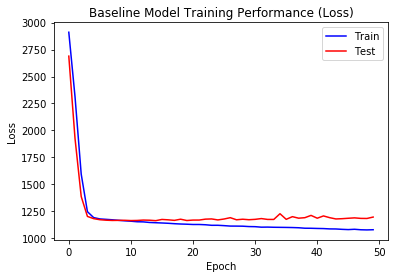

In [0]:
startTimeModule = datetime.now()

# Initialize the baseline model
reset_random(seedNum)
baseline_model_1_a = create_model_1_a()
baseline_hist_1_a = baseline_model_1_a.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, 
                                       validation_data=(X_test, y_test), verbose=1)
print('Total time for performing cross-validation of the default model:', (datetime.now() - startTimeModule))

# Summarize model training hisotry for accuracy and loss
plt.plot(baseline_hist_1_a.history['loss'], color='blue', label='MAE - Training')
plt.plot(baseline_hist_1_a.history['val_loss'], color='red', label='MAE - Test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 17s 117us/sample - loss: 2740.2813 - val_loss: 2402.3720
Epoch 2/50
141238/141238 [==============================] - 15s 106us/sample - loss: 2001.1423 - val_loss: 1699.1554
Epoch 3/50
141238/141238 [==============================] - 15s 109us/sample - loss: 1445.9780 - val_loss: 1299.6830
Epoch 4/50
141238/141238 [==============================] - 16s 111us/sample - loss: 1267.2921 - val_loss: 1208.1229
Epoch 5/50
141238/141238 [==============================] - 16s 111us/sample - loss: 1239.2589 - val_loss: 1188.2672
Epoch 6/50
141238/141238 [==============================] - 15s 109us/sample - loss: 1229.2963 - val_loss: 1180.2092
Epoch 7/50
141238/141238 [==============================] - 16s 110us/sample - loss: 1227.1373 - val_loss: 1184.2671
Epoch 8/50
141238/141238 [==============================] - 16s 110us/sample - loss: 1224.1959 - val_loss: 1175.2472
Epoch 9/50
14

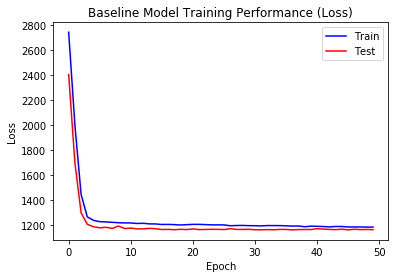

In [0]:
startTimeModule = datetime.now()

# Initialize the baseline model
reset_random(seedNum)
baseline_model_1_b = create_model_1_b()
baseline_hist_1_b = baseline_model_1_b.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, 
                                       validation_data=(X_test, y_test), verbose=1)
print('Total time for performing cross-validation of the default model:', (datetime.now() - startTimeModule))

# Summarize model training hisotry for accuracy and loss
plt.plot(baseline_hist_1_b.history['loss'], color='blue', label='MAE - Training')
plt.plot(baseline_hist_1_b.history['val_loss'], color='red', label='MAE - Test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 16s 116us/sample - loss: 2748.6605 - val_loss: 2442.3919
Epoch 2/50
141238/141238 [==============================] - 16s 110us/sample - loss: 2034.3692 - val_loss: 1742.6872
Epoch 3/50
141238/141238 [==============================] - 15s 108us/sample - loss: 1507.6697 - val_loss: 1334.2298
Epoch 4/50
141238/141238 [==============================] - 15s 110us/sample - loss: 1325.3984 - val_loss: 1224.5766
Epoch 5/50
141238/141238 [==============================] - 15s 109us/sample - loss: 1290.8630 - val_loss: 1193.3427
Epoch 6/50
141238/141238 [==============================] - 15s 108us/sample - loss: 1280.4238 - val_loss: 1186.4467
Epoch 7/50
141238/141238 [==============================] - 16s 111us/sample - loss: 1272.9402 - val_loss: 1186.6799
Epoch 8/50
141238/141238 [==============================] - 15s 107us/sample - loss: 1271.7092 - val_loss: 1187.5120
Epoch 9/50
14

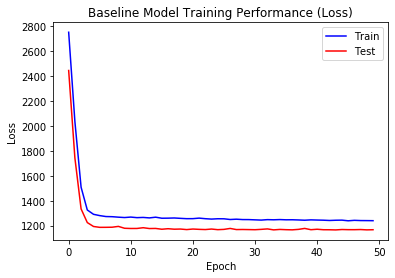

In [0]:
startTimeModule = datetime.now()

# Initialize the baseline model
reset_random(seedNum)
baseline_model_1_c = create_model_1_c()
baseline_hist_1_c = baseline_model_1_c.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, 
                                       validation_data=(X_test, y_test), verbose=1)
print('Total time for performing cross-validation of the default model:', (datetime.now() - startTimeModule))

# Summarize model training hisotry for accuracy and loss
plt.plot(baseline_hist_1_c.history['loss'], color='blue', label='MAE - Training')
plt.plot(baseline_hist_1_c.history['val_loss'], color='red', label='MAE - Test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 16s 115us/sample - loss: 2748.6469 - val_loss: 2444.4342
Epoch 2/50
141238/141238 [==============================] - 15s 107us/sample - loss: 2038.3638 - val_loss: 1737.6318
Epoch 3/50
141238/141238 [==============================] - 15s 107us/sample - loss: 1516.3399 - val_loss: 1323.6907
Epoch 4/50
141238/141238 [==============================] - 15s 107us/sample - loss: 1330.2832 - val_loss: 1234.0896
Epoch 5/50
141238/141238 [==============================] - 15s 109us/sample - loss: 1296.9145 - val_loss: 1205.9332
Epoch 6/50
141238/141238 [==============================] - 15s 108us/sample - loss: 1289.0202 - val_loss: 1190.3358
Epoch 7/50
141238/141238 [==============================] - 15s 110us/sample - loss: 1284.7911 - val_loss: 1198.9252
Epoch 8/50
141238/141238 [==============================] - 15s 108us/sample - loss: 1285.0769 - val_loss: 1188.9997
Epoch 9/50
14

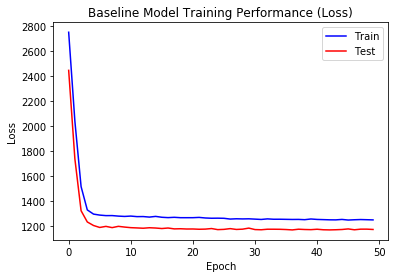

In [0]:
startTimeModule = datetime.now()

# Initialize the baseline model
reset_random(seedNum)
baseline_model_1_d = create_model_1_d()
baseline_hist_1_d = baseline_model_1_d.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, 
                                       validation_data=(X_test, y_test), verbose=1)
print('Total time for performing cross-validation of the default model:', (datetime.now() - startTimeModule))

# Summarize model training hisotry for accuracy and loss
plt.plot(baseline_hist_1_d.history['loss'], color='blue', label='MAE - Training')
plt.plot(baseline_hist_1_d.history['val_loss'], color='red', label='MAE - Test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 16s 116us/sample - loss: 2749.2543 - val_loss: 2422.7305
Epoch 2/50
141238/141238 [==============================] - 15s 108us/sample - loss: 2041.7007 - val_loss: 1708.2051
Epoch 3/50
141238/141238 [==============================] - 16s 111us/sample - loss: 1526.5019 - val_loss: 1333.3033
Epoch 4/50
141238/141238 [==============================] - 15s 108us/sample - loss: 1342.7912 - val_loss: 1238.7334
Epoch 5/50
141238/141238 [==============================] - 15s 109us/sample - loss: 1307.5008 - val_loss: 1213.0925
Epoch 6/50
141238/141238 [==============================] - 15s 109us/sample - loss: 1299.4279 - val_loss: 1200.6516
Epoch 7/50
141238/141238 [==============================] - 16s 111us/sample - loss: 1294.4026 - val_loss: 1203.5235
Epoch 8/50
141238/141238 [==============================] - 15s 107us/sample - loss: 1292.7439 - val_loss: 1191.4162
Epoch 9/50
14

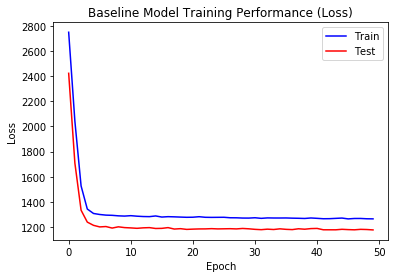

In [0]:
startTimeModule = datetime.now()

# Initialize the baseline model
reset_random(seedNum)
baseline_model_1_e = create_model_1_e()
baseline_hist_1_e = baseline_model_1_e.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, 
                                       validation_data=(X_test, y_test), verbose=1)
print('Total time for performing cross-validation of the default model:', (datetime.now() - startTimeModule))

# Summarize model training hisotry for accuracy and loss
plt.plot(baseline_hist_1_e.history['loss'], color='blue', label='MAE - Training')
plt.plot(baseline_hist_1_e.history['val_loss'], color='red', label='MAE - Test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
if (notifyStatus): email_notify("Phase 3 Fit and Evaluate Model completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 4. Fit and Evaluate Model Set #2

In [0]:
if (notifyStatus): email_notify("Phase 4 Fit and Evaluate Model Set #2 has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [0]:
# Define MLP model #2_a
def create_model_2_a():
    default_model = Sequential()
    default_model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dense(128, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dense(64, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dense(1, kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer)
    return default_model

In [0]:
# Define MLP model #2_b
def create_model_2_b():
    default_model = Sequential()
    default_model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(128, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(64, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(1, kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer)
    return default_model

In [0]:
# Define MLP model #2_c
def create_model_2_c():
    default_model = Sequential()
    default_model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(128, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(64, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(1, kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer)
    return default_model

In [0]:
# Define MLP model #2_d
def create_model_2_d():
    default_model = Sequential()
    default_model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(128, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(64, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(1, kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer)
    return default_model

In [0]:
# Define MLP model #2_e
def create_model_2_e():
    default_model = Sequential()
    default_model.add(Dense(256, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(128, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(64, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(1, kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer)
    return default_model

Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 15s 108us/sample - loss: 2456.2087 - val_loss: 1849.3269
Epoch 2/50
141238/141238 [==============================] - 14s 100us/sample - loss: 1436.1277 - val_loss: 1238.9883
Epoch 3/50
141238/141238 [==============================] - 15s 103us/sample - loss: 1207.1588 - val_loss: 1185.7269
Epoch 4/50
141238/141238 [==============================] - 15s 103us/sample - loss: 1189.6992 - val_loss: 1180.8618
Epoch 5/50
141238/141238 [==============================] - 14s 101us/sample - loss: 1181.4086 - val_loss: 1178.8264
Epoch 6/50
141238/141238 [==============================] - 14s 102us/sample - loss: 1173.1838 - val_loss: 1170.1764
Epoch 7/50
141238/141238 [==============================] - 14s 102us/sample - loss: 1169.1910 - val_loss: 1171.6768
Epoch 8/50
141238/141238 [==============================] - 14s 102us/sample - loss: 1166.2258 - val_loss: 1174.0377
Epoch 9/50
14

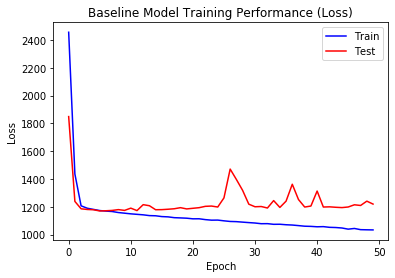

In [0]:
startTimeModule = datetime.now()

# Initialize the baseline model
reset_random(seedNum)
baseline_model_2_a = create_model_2_a()
baseline_hist_2_a = baseline_model_2_a.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, 
                                       validation_data=(X_test, y_test), verbose=1)
print('Total time for performing cross-validation of the default model:', (datetime.now() - startTimeModule))

# Summarize model training hisotry for accuracy and loss
plt.plot(baseline_hist_2_a.history['loss'], color='blue', label='MAE - Training')
plt.plot(baseline_hist_2_a.history['val_loss'], color='red', label='MAE - Test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 16s 111us/sample - loss: 2472.9041 - val_loss: 1897.5424
Epoch 2/50
141238/141238 [==============================] - 15s 104us/sample - loss: 1484.3956 - val_loss: 1273.4005
Epoch 3/50
141238/141238 [==============================] - 15s 105us/sample - loss: 1241.8626 - val_loss: 1196.9152
Epoch 4/50
141238/141238 [==============================] - 15s 105us/sample - loss: 1219.1960 - val_loss: 1178.9612
Epoch 5/50
141238/141238 [==============================] - 15s 106us/sample - loss: 1214.0281 - val_loss: 1176.0797
Epoch 6/50
141238/141238 [==============================] - 15s 105us/sample - loss: 1205.1214 - val_loss: 1173.2231
Epoch 7/50
141238/141238 [==============================] - 15s 106us/sample - loss: 1204.4623 - val_loss: 1170.6553
Epoch 8/50
141238/141238 [==============================] - 15s 109us/sample - loss: 1201.8862 - val_loss: 1166.8613
Epoch 9/50
14

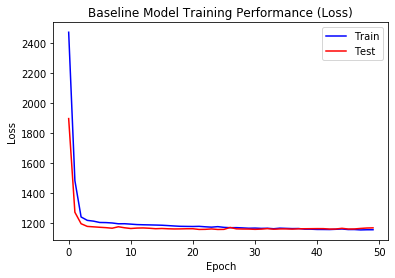

In [0]:
startTimeModule = datetime.now()

# Initialize the baseline model
reset_random(seedNum)
baseline_model_2_b = create_model_2_b()
baseline_hist_2_b = baseline_model_2_b.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, 
                                       validation_data=(X_test, y_test), verbose=1)
print('Total time for performing cross-validation of the default model:', (datetime.now() - startTimeModule))

# Summarize model training hisotry for accuracy and loss
plt.plot(baseline_hist_2_b.history['loss'], color='blue', label='MAE - Training')
plt.plot(baseline_hist_2_b.history['val_loss'], color='red', label='MAE - Test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 16s 110us/sample - loss: 2489.8840 - val_loss: 1939.7427
Epoch 2/50
141238/141238 [==============================] - 15s 104us/sample - loss: 1527.5691 - val_loss: 1287.0686
Epoch 3/50
141238/141238 [==============================] - 15s 106us/sample - loss: 1270.2533 - val_loss: 1197.9597
Epoch 4/50
141238/141238 [==============================] - 15s 106us/sample - loss: 1244.1277 - val_loss: 1184.4486
Epoch 5/50
141238/141238 [==============================] - 15s 107us/sample - loss: 1237.8953 - val_loss: 1180.1461
Epoch 6/50
141238/141238 [==============================] - 15s 107us/sample - loss: 1230.6307 - val_loss: 1177.2161
Epoch 7/50
141238/141238 [==============================] - 15s 105us/sample - loss: 1231.1071 - val_loss: 1170.7558
Epoch 8/50
141238/141238 [==============================] - 15s 105us/sample - loss: 1228.2174 - val_loss: 1168.6333
Epoch 9/50
14

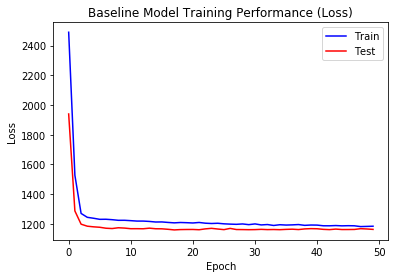

In [0]:
startTimeModule = datetime.now()

# Initialize the baseline model
reset_random(seedNum)
baseline_model_2_c = create_model_2_c()
baseline_hist_2_c = baseline_model_2_c.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, 
                                       validation_data=(X_test, y_test), verbose=1)
print('Total time for performing cross-validation of the default model:', (datetime.now() - startTimeModule))

# Summarize model training hisotry for accuracy and loss
plt.plot(baseline_hist_2_c.history['loss'], color='blue', label='MAE - Training')
plt.plot(baseline_hist_2_c.history['val_loss'], color='red', label='MAE - Test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 16s 117us/sample - loss: 2491.5426 - val_loss: 1926.9485
Epoch 2/50
141238/141238 [==============================] - 15s 107us/sample - loss: 1539.7656 - val_loss: 1297.8532
Epoch 3/50
141238/141238 [==============================] - 15s 106us/sample - loss: 1283.9489 - val_loss: 1197.8248
Epoch 4/50
141238/141238 [==============================] - 15s 107us/sample - loss: 1255.5405 - val_loss: 1189.0595
Epoch 5/50
141238/141238 [==============================] - 15s 107us/sample - loss: 1247.6110 - val_loss: 1188.7388
Epoch 6/50
141238/141238 [==============================] - 15s 106us/sample - loss: 1239.9140 - val_loss: 1181.2550
Epoch 7/50
141238/141238 [==============================] - 15s 107us/sample - loss: 1238.2899 - val_loss: 1177.8527
Epoch 8/50
141238/141238 [==============================] - 15s 106us/sample - loss: 1235.6680 - val_loss: 1171.2070
Epoch 9/50
14

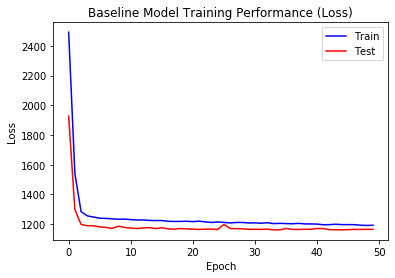

In [0]:
startTimeModule = datetime.now()

# Initialize the baseline model
reset_random(seedNum)
baseline_model_2_d = create_model_2_d()
baseline_hist_2_d = baseline_model_2_d.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, 
                                       validation_data=(X_test, y_test), verbose=1)
print('Total time for performing cross-validation of the default model:', (datetime.now() - startTimeModule))

# Summarize model training hisotry for accuracy and loss
plt.plot(baseline_hist_2_d.history['loss'], color='blue', label='MAE - Training')
plt.plot(baseline_hist_2_d.history['val_loss'], color='red', label='MAE - Test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 16s 114us/sample - loss: 2492.2953 - val_loss: 1958.3820
Epoch 2/50
141238/141238 [==============================] - 15s 108us/sample - loss: 1547.9026 - val_loss: 1312.7540
Epoch 3/50
141238/141238 [==============================] - 16s 110us/sample - loss: 1295.1894 - val_loss: 1208.9112
Epoch 4/50
141238/141238 [==============================] - 15s 105us/sample - loss: 1267.7044 - val_loss: 1199.5399
Epoch 5/50
141238/141238 [==============================] - 15s 105us/sample - loss: 1260.1671 - val_loss: 1196.9041
Epoch 6/50
141238/141238 [==============================] - 15s 106us/sample - loss: 1251.1921 - val_loss: 1188.5017
Epoch 7/50
141238/141238 [==============================] - 15s 105us/sample - loss: 1251.7279 - val_loss: 1183.0672
Epoch 8/50
141238/141238 [==============================] - 15s 108us/sample - loss: 1249.4592 - val_loss: 1179.8143
Epoch 9/50
14

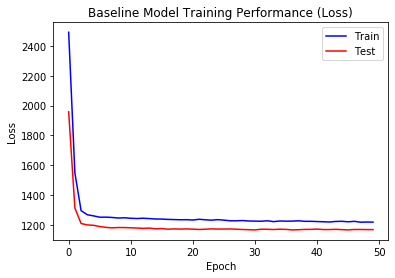

In [0]:
startTimeModule = datetime.now()

# Initialize the baseline model
reset_random(seedNum)
baseline_model_2_e = create_model_2_e()
baseline_hist_2_e = baseline_model_2_e.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, 
                                       validation_data=(X_test, y_test), verbose=1)
print('Total time for performing cross-validation of the default model:', (datetime.now() - startTimeModule))

# Summarize model training hisotry for accuracy and loss
plt.plot(baseline_hist_2_e.history['loss'], color='blue', label='MAE - Training')
plt.plot(baseline_hist_2_e.history['val_loss'], color='red', label='MAE - Test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
if (notifyStatus): email_notify("Phase 4 Fit and Evaluate Model Set #2! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 5. Fit and Evaluate Model Set #3

In [0]:
if (notifyStatus): email_notify("Phase 5 Fit and Evaluate Model Set #3 has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [0]:
# Define MLP model #3_a
def create_model_3_a():
    default_model = Sequential()
    default_model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dense(256, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dense(128, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dense(1, kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer)
    return default_model

In [0]:
# Define MLP model #3_b
def create_model_3_b():
    default_model = Sequential()
    default_model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(256, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(128, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(1, kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer)
    return default_model

In [0]:
# Define MLP model #3_c
def create_model_3_c():
    default_model = Sequential()
    default_model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(256, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(128, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(1, kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer)
    return default_model

In [0]:
# Define MLP model #3_d
def create_model_3_d():
    default_model = Sequential()
    default_model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(256, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(128, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(1, kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer)
    return default_model

In [0]:
# Define MLP model #3_e
def create_model_3_e():
    default_model = Sequential()
    default_model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(256, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(128, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(1, kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer)
    return default_model

Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 15s 109us/sample - loss: 2057.0200 - val_loss: 1327.4159
Epoch 2/50
141238/141238 [==============================] - 14s 103us/sample - loss: 1224.0332 - val_loss: 1188.9633
Epoch 3/50
141238/141238 [==============================] - 14s 102us/sample - loss: 1189.1143 - val_loss: 1177.2301
Epoch 4/50
141238/141238 [==============================] - 14s 101us/sample - loss: 1177.8138 - val_loss: 1177.3730
Epoch 5/50
141238/141238 [==============================] - 14s 101us/sample - loss: 1170.1033 - val_loss: 1209.9842
Epoch 6/50
141238/141238 [==============================] - 14s 102us/sample - loss: 1161.6556 - val_loss: 1244.3207
Epoch 7/50
141238/141238 [==============================] - 15s 103us/sample - loss: 1158.4905 - val_loss: 1176.7236
Epoch 8/50
141238/141238 [==============================] - 14s 101us/sample - loss: 1155.9143 - val_loss: 1189.4238
Epoch 9/50
14

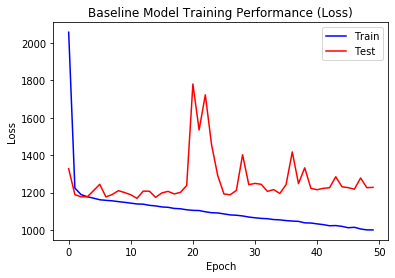

In [0]:
startTimeModule = datetime.now()

# Initialize the baseline model
reset_random(seedNum)
baseline_model_3_a = create_model_3_a()
baseline_hist_3_a = baseline_model_3_a.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, 
                                       validation_data=(X_test, y_test), verbose=1)
print('Total time for performing cross-validation of the default model:', (datetime.now() - startTimeModule))

# Summarize model training hisotry for accuracy and loss
plt.plot(baseline_hist_3_a.history['loss'], color='blue', label='MAE - Training')
plt.plot(baseline_hist_3_a.history['val_loss'], color='red', label='MAE - Test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 15s 110us/sample - loss: 2084.6995 - val_loss: 1346.9505
Epoch 2/50
141238/141238 [==============================] - 15s 103us/sample - loss: 1247.0770 - val_loss: 1190.7322
Epoch 3/50
141238/141238 [==============================] - 15s 106us/sample - loss: 1208.5849 - val_loss: 1175.6971
Epoch 4/50
141238/141238 [==============================] - 15s 103us/sample - loss: 1197.7702 - val_loss: 1179.8391
Epoch 5/50
141238/141238 [==============================] - 15s 104us/sample - loss: 1191.8479 - val_loss: 1169.7438
Epoch 6/50
141238/141238 [==============================] - 15s 104us/sample - loss: 1186.4122 - val_loss: 1167.3279
Epoch 7/50
141238/141238 [==============================] - 15s 105us/sample - loss: 1183.6128 - val_loss: 1169.0846
Epoch 8/50
141238/141238 [==============================] - 15s 106us/sample - loss: 1182.7322 - val_loss: 1162.2709
Epoch 9/50
14

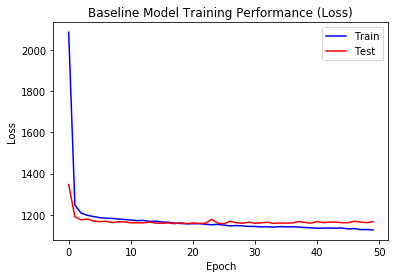

In [0]:
startTimeModule = datetime.now()

# Initialize the baseline model
reset_random(seedNum)
baseline_model_3_b = create_model_3_b()
baseline_hist_3_b = baseline_model_3_b.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, 
                                       validation_data=(X_test, y_test), verbose=1)
print('Total time for performing cross-validation of the default model:', (datetime.now() - startTimeModule))

# Summarize model training hisotry for accuracy and loss
plt.plot(baseline_hist_3_b.history['loss'], color='blue', label='MAE - Training')
plt.plot(baseline_hist_3_b.history['val_loss'], color='red', label='MAE - Test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 16s 112us/sample - loss: 2113.7580 - val_loss: 1397.3211
Epoch 2/50
141238/141238 [==============================] - 15s 105us/sample - loss: 1270.4395 - val_loss: 1198.8550
Epoch 3/50
141238/141238 [==============================] - 15s 104us/sample - loss: 1222.6949 - val_loss: 1177.9008
Epoch 4/50
141238/141238 [==============================] - 15s 105us/sample - loss: 1213.6908 - val_loss: 1173.8336
Epoch 5/50
141238/141238 [==============================] - 15s 104us/sample - loss: 1207.5268 - val_loss: 1173.8928
Epoch 6/50
141238/141238 [==============================] - 15s 106us/sample - loss: 1202.6990 - val_loss: 1168.1814
Epoch 7/50
141238/141238 [==============================] - 15s 103us/sample - loss: 1200.2101 - val_loss: 1166.6655
Epoch 8/50
141238/141238 [==============================] - 15s 103us/sample - loss: 1197.3472 - val_loss: 1164.3197
Epoch 9/50
14

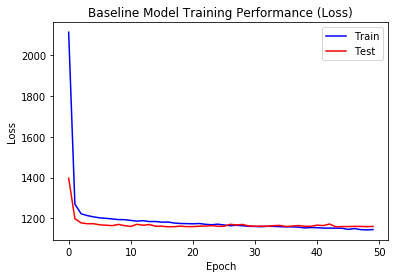

In [0]:
startTimeModule = datetime.now()

# Initialize the baseline model
reset_random(seedNum)
baseline_model_3_c = create_model_3_c()
baseline_hist_3_c = baseline_model_3_c.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, 
                                       validation_data=(X_test, y_test), verbose=1)
print('Total time for performing cross-validation of the default model:', (datetime.now() - startTimeModule))

# Summarize model training hisotry for accuracy and loss
plt.plot(baseline_hist_3_c.history['loss'], color='blue', label='MAE - Training')
plt.plot(baseline_hist_3_c.history['val_loss'], color='red', label='MAE - Test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 16s 115us/sample - loss: 2117.6833 - val_loss: 1445.7395
Epoch 2/50
141238/141238 [==============================] - 15s 104us/sample - loss: 1280.8456 - val_loss: 1208.7703
Epoch 3/50
141238/141238 [==============================] - 15s 105us/sample - loss: 1233.2612 - val_loss: 1188.0519
Epoch 4/50
141238/141238 [==============================] - 15s 104us/sample - loss: 1224.9027 - val_loss: 1179.9550
Epoch 5/50
141238/141238 [==============================] - 15s 105us/sample - loss: 1217.1980 - val_loss: 1174.5858
Epoch 6/50
141238/141238 [==============================] - 15s 105us/sample - loss: 1214.4061 - val_loss: 1172.6572
Epoch 7/50
141238/141238 [==============================] - 15s 104us/sample - loss: 1213.0229 - val_loss: 1173.1509
Epoch 8/50
141238/141238 [==============================] - 15s 106us/sample - loss: 1209.7535 - val_loss: 1166.8774
Epoch 9/50
14

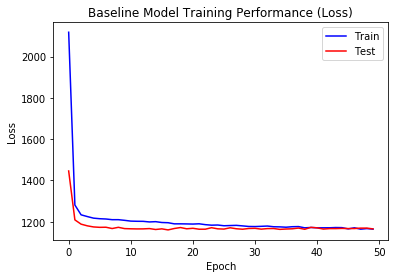

In [0]:
startTimeModule = datetime.now()

# Initialize the baseline model
reset_random(seedNum)
baseline_model_3_d = create_model_3_d()
baseline_hist_3_d = baseline_model_3_d.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, 
                                       validation_data=(X_test, y_test), verbose=1)
print('Total time for performing cross-validation of the default model:', (datetime.now() - startTimeModule))

# Summarize model training hisotry for accuracy and loss
plt.plot(baseline_hist_3_d.history['loss'], color='blue', label='MAE - Training')
plt.plot(baseline_hist_3_d.history['val_loss'], color='red', label='MAE - Test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 16s 110us/sample - loss: 2119.2255 - val_loss: 1412.7332
Epoch 2/50
141238/141238 [==============================] - 15s 103us/sample - loss: 1290.7198 - val_loss: 1207.8287
Epoch 3/50
141238/141238 [==============================] - 15s 104us/sample - loss: 1242.7726 - val_loss: 1189.7299
Epoch 4/50
141238/141238 [==============================] - 15s 106us/sample - loss: 1233.2877 - val_loss: 1186.1090
Epoch 5/50
141238/141238 [==============================] - 15s 105us/sample - loss: 1227.6295 - val_loss: 1178.0028
Epoch 6/50
141238/141238 [==============================] - 15s 103us/sample - loss: 1223.9718 - val_loss: 1176.1148
Epoch 7/50
141238/141238 [==============================] - 15s 103us/sample - loss: 1223.6326 - val_loss: 1174.9538
Epoch 8/50
141238/141238 [==============================] - 14s 102us/sample - loss: 1220.0570 - val_loss: 1167.8218
Epoch 9/50
14

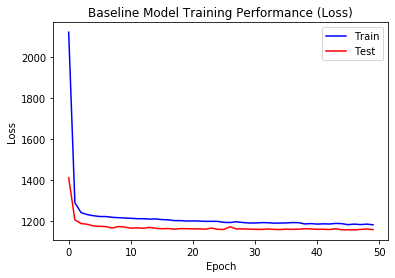

In [0]:
startTimeModule = datetime.now()

# Initialize the baseline model
reset_random(seedNum)
baseline_model_3_e = create_model_3_e()
baseline_hist_3_e = baseline_model_3_e.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, 
                                       validation_data=(X_test, y_test), verbose=1)
print('Total time for performing cross-validation of the default model:', (datetime.now() - startTimeModule))

# Summarize model training hisotry for accuracy and loss
plt.plot(baseline_hist_3_e.history['loss'], color='blue', label='MAE - Training')
plt.plot(baseline_hist_3_e.history['val_loss'], color='red', label='MAE - Test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
# Not applicable for this iteration of the model

In [0]:
if (notifyStatus): email_notify("Phase 5 Fit and Evaluate Model Set #3 completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

# Section 6. Fit and Evaluate Model Set #4

In [0]:
if (notifyStatus): email_notify("Phase 6 Fit and Evaluate Model Set #4 has begun! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [0]:
# Define MLP model #4_a
def create_model_4_a():
    default_model = Sequential()
    default_model.add(Dense(1024, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dense(512, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dense(256, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dense(1, kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer)
    return default_model

In [0]:
# Define MLP model #4_b
def create_model_4_b():
    default_model = Sequential()
    default_model.add(Dense(1024, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(512, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(256, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(1, kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer)
    return default_model

In [0]:
# Define MLP model #4_c
def create_model_4_c():
    default_model = Sequential()
    default_model.add(Dense(1024, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(512, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(256, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(1, kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer)
    return default_model

In [0]:
# Define MLP model #4_d
def create_model_4_d():
    default_model = Sequential()
    default_model.add(Dense(1024, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.25))
    default_model.add(Dense(512, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(256, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(1, kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer)
    return default_model

In [0]:
# Define MLP model #4_e
def create_model_4_e():
    default_model = Sequential()
    default_model.add(Dense(1024, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(512, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(256, activation='relu', kernel_initializer=default_kernel_init))
    default_model.add(BatchNormalization())
    default_model.add(Dropout(0.5))
    default_model.add(Dense(1, kernel_initializer=default_kernel_init))
    default_model.compile(loss=default_loss, optimizer=default_optimizer)
    return default_model

Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 15s 107us/sample - loss: 1712.1009 - val_loss: 1197.3752
Epoch 2/50
141238/141238 [==============================] - 14s 101us/sample - loss: 1200.7924 - val_loss: 1182.4548
Epoch 3/50
141238/141238 [==============================] - 14s 101us/sample - loss: 1185.1682 - val_loss: 1177.6099
Epoch 4/50
141238/141238 [==============================] - 14s 100us/sample - loss: 1174.3097 - val_loss: 1173.2177
Epoch 5/50
141238/141238 [==============================] - 14s 100us/sample - loss: 1167.3669 - val_loss: 1169.7820
Epoch 6/50
141238/141238 [==============================] - 14s 99us/sample - loss: 1158.7917 - val_loss: 1188.0936
Epoch 7/50
141238/141238 [==============================] - 14s 99us/sample - loss: 1156.2449 - val_loss: 1175.5351
Epoch 8/50
141238/141238 [==============================] - 14s 99us/sample - loss: 1151.9288 - val_loss: 1180.5160
Epoch 9/50
14123

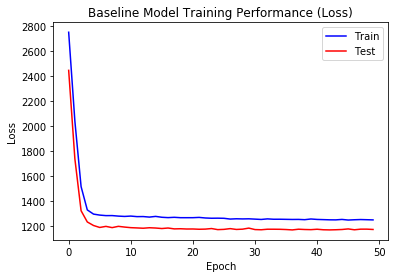

In [0]:
startTimeModule = datetime.now()

# Initialize the baseline model
reset_random(seedNum)
baseline_model_4_a = create_model_4_a()
baseline_hist_4_a = baseline_model_4_a.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, 
                                       validation_data=(X_test, y_test), verbose=1)
print('Total time for performing cross-validation of the default model:', (datetime.now() - startTimeModule))

# Summarize model training hisotry for accuracy and loss
plt.plot(baseline_hist_1_d.history['loss'], color='blue', label='MAE - Training')
plt.plot(baseline_hist_1_d.history['val_loss'], color='red', label='MAE - Test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 15s 109us/sample - loss: 1735.0767 - val_loss: 1198.4951
Epoch 2/50
141238/141238 [==============================] - 14s 103us/sample - loss: 1210.2509 - val_loss: 1178.9192
Epoch 3/50
141238/141238 [==============================] - 15s 104us/sample - loss: 1195.8685 - val_loss: 1173.2491
Epoch 4/50
141238/141238 [==============================] - 15s 104us/sample - loss: 1187.3981 - val_loss: 1171.8145
Epoch 5/50
141238/141238 [==============================] - 15s 104us/sample - loss: 1180.1486 - val_loss: 1168.2824
Epoch 6/50
141238/141238 [==============================] - 14s 102us/sample - loss: 1173.9408 - val_loss: 1167.2454
Epoch 7/50
141238/141238 [==============================] - 14s 103us/sample - loss: 1171.5603 - val_loss: 1168.0025
Epoch 8/50
141238/141238 [==============================] - 15s 104us/sample - loss: 1169.1709 - val_loss: 1160.8382
Epoch 9/50
14

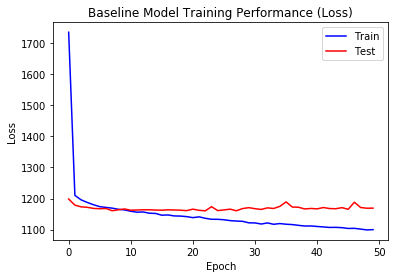

In [0]:
startTimeModule = datetime.now()

# Initialize the baseline model
reset_random(seedNum)
baseline_model_4_b = create_model_4_b()
baseline_hist_4_b = baseline_model_4_b.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, 
                                       validation_data=(X_test, y_test), verbose=1)
print('Total time for performing cross-validation of the default model:', (datetime.now() - startTimeModule))

# Summarize model training hisotry for accuracy and loss
plt.plot(baseline_hist_4_b.history['loss'], color='blue', label='MAE - Training')
plt.plot(baseline_hist_4_b.history['val_loss'], color='red', label='MAE - Test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 16s 111us/sample - loss: 1760.6028 - val_loss: 1204.7875
Epoch 2/50
141238/141238 [==============================] - 15s 105us/sample - loss: 1218.5130 - val_loss: 1178.1447
Epoch 3/50
141238/141238 [==============================] - 15s 106us/sample - loss: 1205.1657 - val_loss: 1171.9702
Epoch 4/50
141238/141238 [==============================] - 15s 107us/sample - loss: 1195.7313 - val_loss: 1169.1640
Epoch 5/50
141238/141238 [==============================] - 15s 104us/sample - loss: 1190.2336 - val_loss: 1166.4566
Epoch 6/50
141238/141238 [==============================] - 15s 106us/sample - loss: 1183.6145 - val_loss: 1174.4520
Epoch 7/50
141238/141238 [==============================] - 15s 106us/sample - loss: 1184.2296 - val_loss: 1165.3922
Epoch 8/50
141238/141238 [==============================] - 15s 103us/sample - loss: 1180.5797 - val_loss: 1162.8097
Epoch 9/50
14

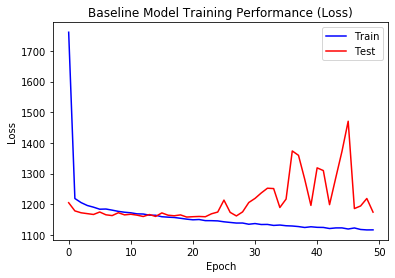

In [0]:
startTimeModule = datetime.now()

# Initialize the baseline model
reset_random(seedNum)
baseline_model_4_c = create_model_4_c()
baseline_hist_4_c = baseline_model_4_c.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, 
                                       validation_data=(X_test, y_test), verbose=1)
print('Total time for performing cross-validation of the default model:', (datetime.now() - startTimeModule))

# Summarize model training hisotry for accuracy and loss
plt.plot(baseline_hist_4_c.history['loss'], color='blue', label='MAE - Training')
plt.plot(baseline_hist_4_c.history['val_loss'], color='red', label='MAE - Test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 17s 118us/sample - loss: 1763.8088 - val_loss: 1208.0115
Epoch 2/50
141238/141238 [==============================] - 16s 111us/sample - loss: 1224.7351 - val_loss: 1181.5517
Epoch 3/50
141238/141238 [==============================] - 16s 112us/sample - loss: 1209.0664 - val_loss: 1170.4085
Epoch 4/50
141238/141238 [==============================] - 16s 110us/sample - loss: 1200.6071 - val_loss: 1170.9751
Epoch 5/50
141238/141238 [==============================] - 16s 114us/sample - loss: 1195.7867 - val_loss: 1166.4497
Epoch 6/50
141238/141238 [==============================] - 16s 111us/sample - loss: 1190.6093 - val_loss: 1163.8972
Epoch 7/50
141238/141238 [==============================] - 16s 111us/sample - loss: 1189.5676 - val_loss: 1176.3278
Epoch 8/50
141238/141238 [==============================] - 16s 111us/sample - loss: 1187.4618 - val_loss: 1161.7577
Epoch 9/50
14

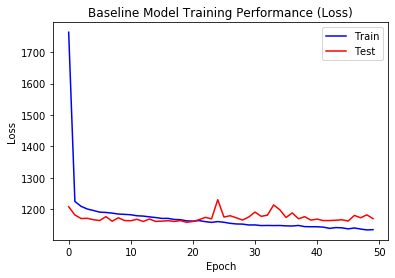

In [0]:
startTimeModule = datetime.now()

# Initialize the baseline model
reset_random(seedNum)
baseline_model_4_d = create_model_4_d()
baseline_hist_4_d = baseline_model_4_d.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, 
                                       validation_data=(X_test, y_test), verbose=1)
print('Total time for performing cross-validation of the default model:', (datetime.now() - startTimeModule))

# Summarize model training hisotry for accuracy and loss
plt.plot(baseline_hist_4_d.history['loss'], color='blue', label='MAE - Training')
plt.plot(baseline_hist_4_d.history['val_loss'], color='red', label='MAE - Test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Train on 141238 samples, validate on 47080 samples
Epoch 1/50
141238/141238 [==============================] - 17s 121us/sample - loss: 1768.0388 - val_loss: 1222.8097
Epoch 2/50
141238/141238 [==============================] - 16s 112us/sample - loss: 1230.7601 - val_loss: 1188.0920
Epoch 3/50
141238/141238 [==============================] - 16s 115us/sample - loss: 1219.4748 - val_loss: 1182.5361
Epoch 4/50
141238/141238 [==============================] - 16s 114us/sample - loss: 1210.0300 - val_loss: 1172.4791
Epoch 5/50
141238/141238 [==============================] - 16s 115us/sample - loss: 1207.4356 - val_loss: 1171.4190
Epoch 6/50
141238/141238 [==============================] - 16s 113us/sample - loss: 1200.1964 - val_loss: 1169.2756
Epoch 7/50
141238/141238 [==============================] - 16s 111us/sample - loss: 1200.3775 - val_loss: 1168.4477
Epoch 8/50
141238/141238 [==============================] - 16s 112us/sample - loss: 1198.2970 - val_loss: 1164.1282
Epoch 9/50
14

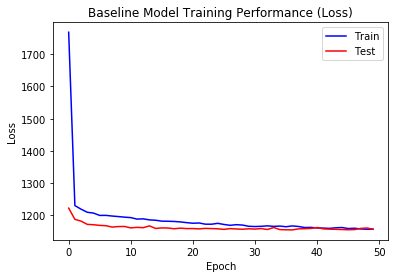

In [0]:
startTimeModule = datetime.now()

# Initialize the baseline model
reset_random(seedNum)
baseline_model_4_e = create_model_4_e()
baseline_hist_4_e = baseline_model_4_e.fit(X_train, y_train, epochs=default_epoch, batch_size=default_batch, 
                                       validation_data=(X_test, y_test), verbose=1)
print('Total time for performing cross-validation of the default model:', (datetime.now() - startTimeModule))

# Summarize model training hisotry for accuracy and loss
plt.plot(baseline_hist_4_e.history['loss'], color='blue', label='MAE - Training')
plt.plot(baseline_hist_4_e.history['val_loss'], color='red', label='MAE - Test')
plt.title('Baseline Model Training Performance (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
if (notifyStatus): email_notify("Phase 6 Fit and Evaluate Model Set #4 completed! "+datetime.now().strftime('%a %B %d, %Y %I:%M:%S %p'))

In [0]:
print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 4:11:10.484131
